In [27]:
%matplotlib inline

import sys
import pickle
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils3D import *
from graph import *
from points_generation3D import *
from initial_guess3D import *
from variational3D import *
from gmr import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
elm = pickle.load( open('../results/elm-1000C-halton2-standard.pkl', 'rb') )


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:

success: False

status: 5

message: Number of calls to function has reached maxfev = 100000.

nfev: 100025
Residual RMS: 0.291081260409
Residual Variance: 0.000659798385188
Residual Entropy: 6.6460617447
Total elapsed time: 10239.9802489 [s]


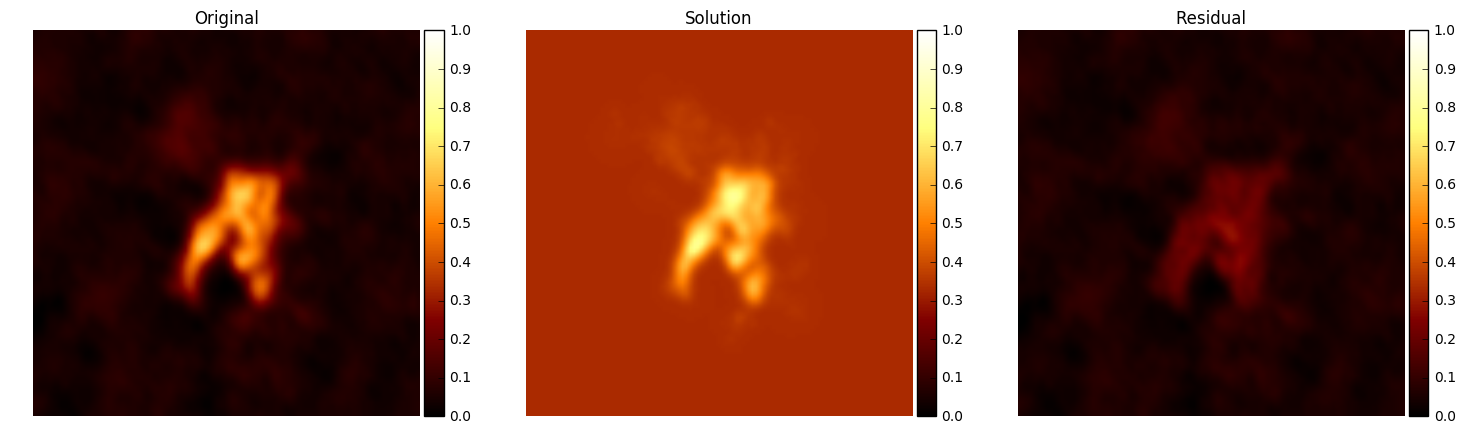

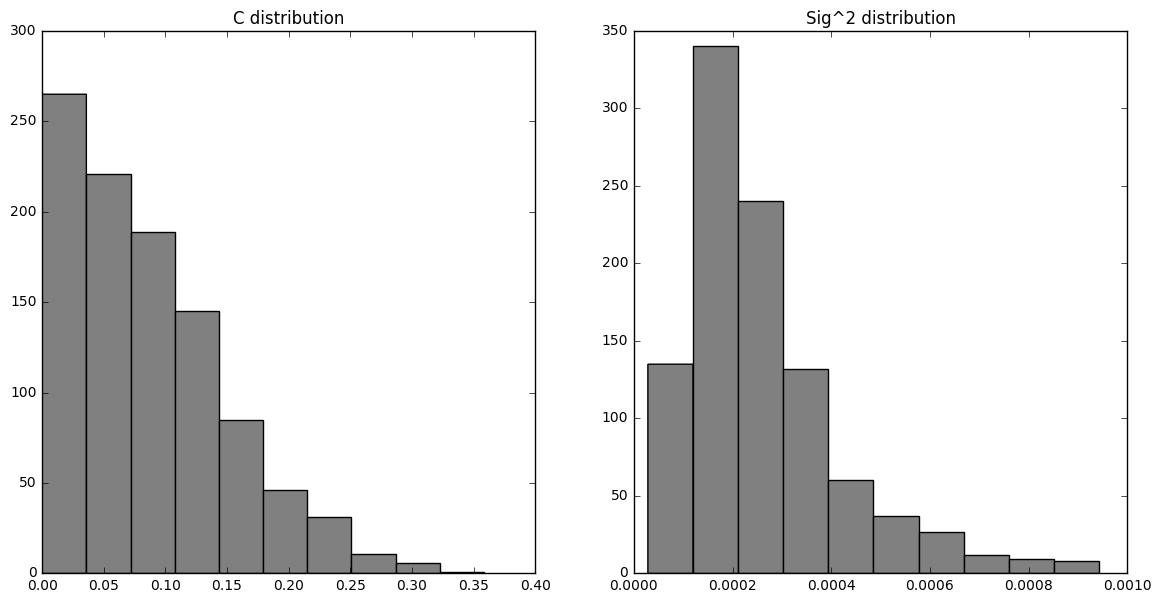

In [29]:
elm.summarize()

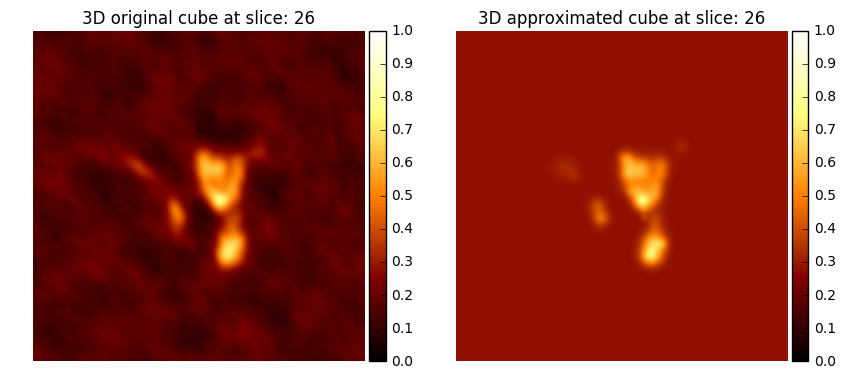

In [4]:
# visualization of solution
xc, yc, zc, c, sig = elm.get_params_mapped()
u_sol = compute_solution(c, sig, xc, yc, zc, dims=elm.dims)
interact(comparative_slices_plot, data1=fixed(elm.data), data2=fixed(u_sol+elm.base_level), slc=(0, elm.dims[0]-1))

In [5]:
# gaussian agglomeration
xc, yc, zc, c, sig = elm.get_params_mapped()
mu = np.vstack([xc, yc, zc]).T

components_dict = gaussian_reduction(c, mu, sig, n_comp=1)

Merged components 287 and 611 with 1.34316113787e-10 dissimilarity
Merged components 200 and 609 with 1.6886809621e-09 dissimilarity
Merged components 734 and 857 with 4.2023669568e-07 dissimilarity
Merged components 547 and 776 with 6.30771097576e-07 dissimilarity
Merged components 508 and 628 with 1.51437261465e-06 dissimilarity
Merged components 898 and 994 with 1.32688897738e-05 dissimilarity
Merged components 134 and 261 with 3.08416200309e-05 dissimilarity
Merged components 48 and 166 with 5.010663087e-05 dissimilarity
Merged components 135 and 495 with 7.55807948785e-05 dissimilarity
Merged components 457 and 683 with 8.75550122773e-05 dissimilarity
Merged components 768 and 902 with 9.45258634258e-05 dissimilarity
Merged components 670 and 783 with 9.49779822107e-05 dissimilarity
Merged components 411 and 670 with 9.76386525941e-05 dissimilarity
Merged components 136 and 290 with 0.000111713546046 dissimilarity
Merged components 239 and 953 with 0.000136549252648 dissimilarity


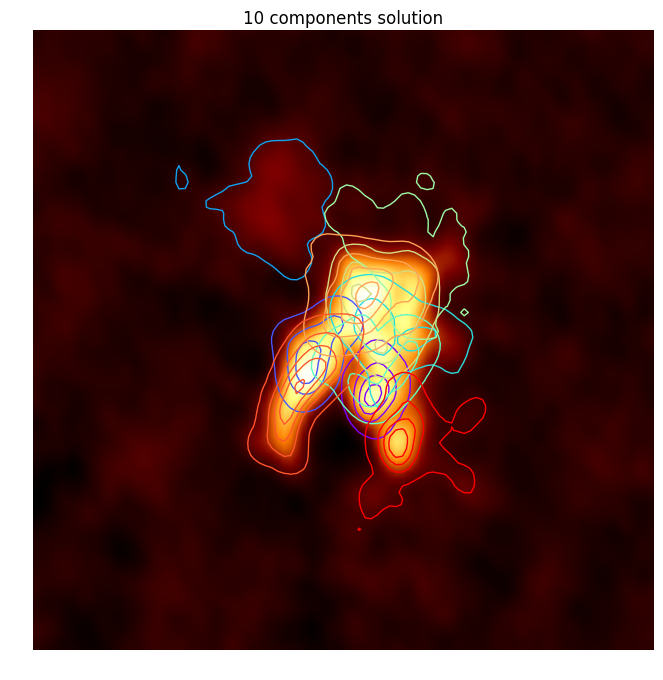

In [23]:
components_plot3D(elm, components_dict, 10)